Looking at the data output from make_mockobs.  Double checking that it looks right.

In [1]:
import numpy as np
import eagle_constants_and_units as c
import cosmo_utils as csu
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import mpl_toolkits.axes_grid1 as axgrid
from astropy import constants as const
from astropy import units as u

import os
import get_halpha_SB

%matplotlib inline

%run 'load_data.ipynb'
%run 'add_noise.ipynb'
%run 'extract_FOV.ipynb'

In [3]:
R_ARRAY = np.load('noisy_fov_1000.0hr_oldcam_100Mpcdist_14.0arcsec_20slwd_RARRAY.npz')['arr_0']

(843, 563)
The variance of the R_ARRAY is 120202794.925
The variance of the sum dist:  120000000.0


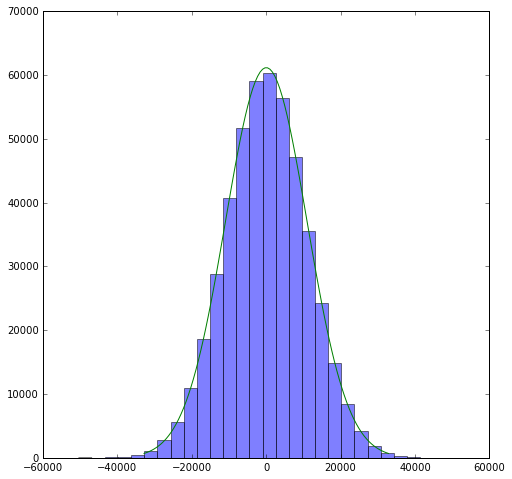

In [42]:
print R_ARRAY.shape
fig, (ax) = plt.subplots(1, 1, figsize=(8, 8));
ax.hist(np.ravel(R_ARRAY),edgecolor='black', alpha = 0.5,bins=30);
print "The variance of the R_ARRAY is %s"%(np.std(R_ARRAY)**2)

import matplotlib.mlab as mlab

mu = 0
numtotal = 1200000.  # number of R values drawn and summed from gaussian with the following sigma
stddev = 10.  # sigma = R
variance = (numtotal*stddev**2)
print "The variance of the sum dist:  %s"%variance
sigma = np.sqrt(variance)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
ax.plot(x,mlab.normpdf(x, mu, sigma)*variance*14.)

In [45]:
843* 563

474609

In [53]:
for j in range(20):
    array = np.zeros(474609)
    for i in range(474609):
        array[i]=np.random.normal(0,np.sqrt(numtotal*stddev**2))
    print "The variance of the test array is %s"%(np.std(array)**2)

The variance of the test array is 120204226.273
The variance of the test array is 119876005.552
The variance of the test array is 120226734.679
The variance of the test array is 119906135.331
The variance of the test array is 119998907.062
The variance of the test array is 120310006.161
The variance of the test array is 120241698.737
The variance of the test array is 120141458.386
The variance of the test array is 120503715.876
The variance of the test array is 120154677.323
The variance of the test array is 119927048.848
The variance of the test array is 119944689.46
The variance of the test array is 119577925.234
The variance of the test array is 119724599.529
The variance of the test array is 119674075.133
The variance of the test array is 119952769.094
The variance of the test array is 119994886.328
The variance of the test array is 119956114.391
The variance of the test array is 120292673.669
The variance of the test array is 119924355.69


In [56]:
FOVdata = np.load('noisy_fov_1000.0hr_oldcam_100Mpcdist_14.0arcsec_20slwd.npz')['arr_0'];
## copied from the output of make_mockobs
#xystarts are:
xystarts = [44.8636687, 10.2424458]
#size is:
size = [5.2726626, 3.5151084000000004]
print FOVdata.shape

(843, 563)


The type of size is <type 'list'>


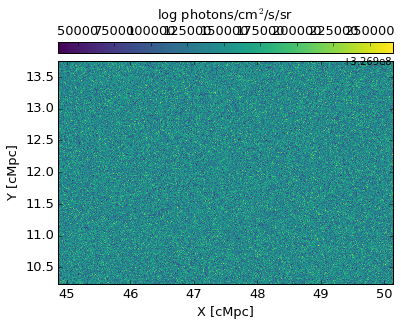

In [58]:
fig, (ax1) = plt.subplots(1, 1, figsize=(6, 6))
get_halpha_SB.makemap(FOVdata,size,ax1,xystarts = xystarts)